170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 75s 0us/step


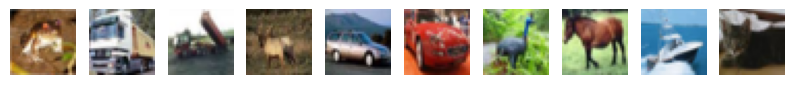

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()

In [3]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [92]:
from tensorflow.keras import layers, models, Input

model = models.Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

In [96]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3371 - loss: 1.7943 - val_accuracy: 0.5170 - val_loss: 1.3508 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5471 - loss: 1.2712 - val_accuracy: 0.5976 - val_loss: 1.1231 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6196 - loss: 1.0822 - val_accuracy: 0.6373 - val_loss: 1.0304 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6541 - loss: 0.9871 - val_accuracy: 0.6661 - val_loss: 0.9515 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6856 - loss: 0.8957 - val_accuracy: 0.6647 - val_loss: 0.9585 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7096 - loss: 0.8296 - val_accuracy: 0.6763 - val_loss: 0.9450 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7293 - loss: 0.7790 - 

In [98]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

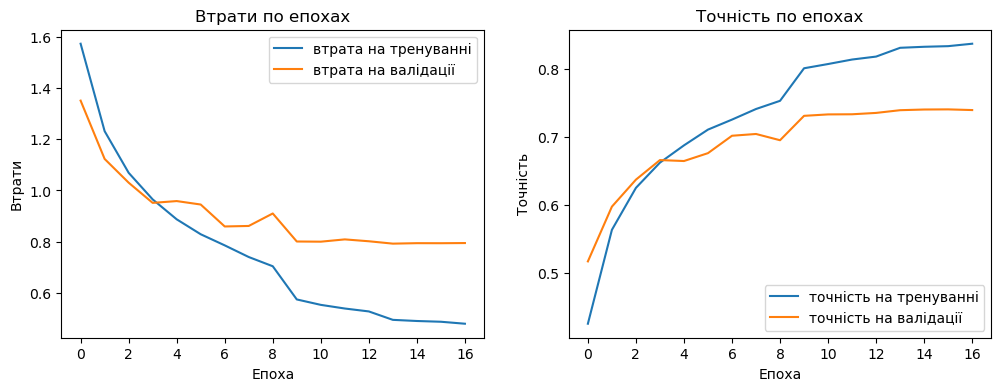

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='втрата на тренуванні')
plt.plot(history.history['val_loss'], label='втрата на валідації')
plt.title('Втрати по епохах')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='точність на валідації')
plt.title('Точність по епохах')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.show()


In [106]:
from sklearn.metrics import classification_report
import numpy as np

predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)
report = classification_report(true_labels, predictions, target_names=[str(i) for i in range(10)])
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1000
           1       0.82      0.85      0.83      1000
           2       0.65      0.64      0.64      1000
           3       0.60      0.56      0.58      1000
           4       0.72      0.69      0.71      1000
           5       0.64      0.65      0.64      1000
           6       0.80      0.81      0.81      1000
           7       0.77      0.78      0.77      1000
           8       0.82      0.85      0.83      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



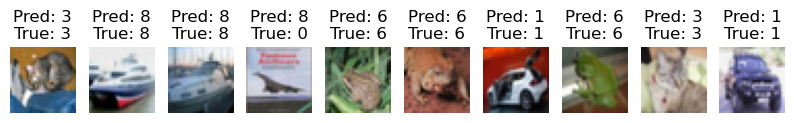

In [108]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {predictions[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()